<a href="https://colab.research.google.com/github/dtphuong2612/Projects/blob/main/Predict_handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AI4E/datasetA-Z/A_Z Handwritten Data.csv')


In [ ]:
X = data.drop('0',axis = 1)
y = data['0']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

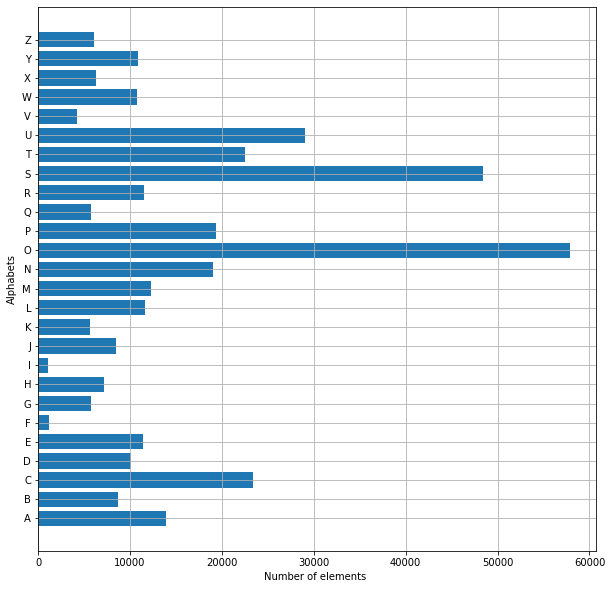

In [ ]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

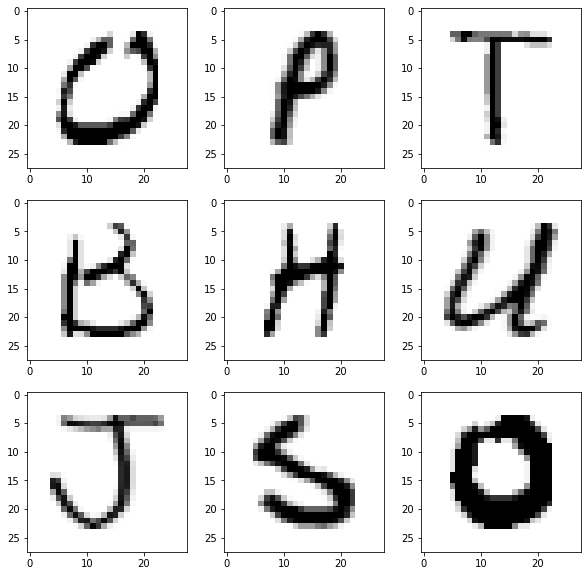

In [ ]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i].astype(np.uint8), 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [ ]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [ ]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=10,  validation_data = (test_X,test_yOHE))

Epoch 1/10
9312/9312 [==============================] - 40s 4ms/step - loss: 0.0392 - accuracy: 0.9893 - val_loss: 0.0338 - val_accuracy: 0.9910
Epoch 2/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0250 - accuracy: 0.9933 - val_loss: 0.0267 - val_accuracy: 0.9929
Epoch 3/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0176 - accuracy: 0.9954 - val_loss: 0.0233 - val_accuracy: 0.9939
Epoch 4/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0122 - accuracy: 0.9968 - val_loss: 0.0208 - val_accuracy: 0.9947
Epoch 5/10
9312/9312 [==============================] - 36s 4ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.0198 - val_accuracy: 0.9953
Epoch 6/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0194 - val_accuracy: 0.9956
Epoch 7/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.0200 - val_ac

In [ ]:
print("The validation accuracy is :", history.history['val_accuracy'][0])
print("The training accuracy is :", history.history['accuracy'][0])
print("The validation loss is :", history.history['val_loss'][0])
print("The training loss is :", history.history['loss'][0])

The validation accuracy is : 0.9909786581993103
The training accuracy is : 0.9893274307250977
The validation loss is : 0.033849913626909256
The training loss is : 0.03921893984079361


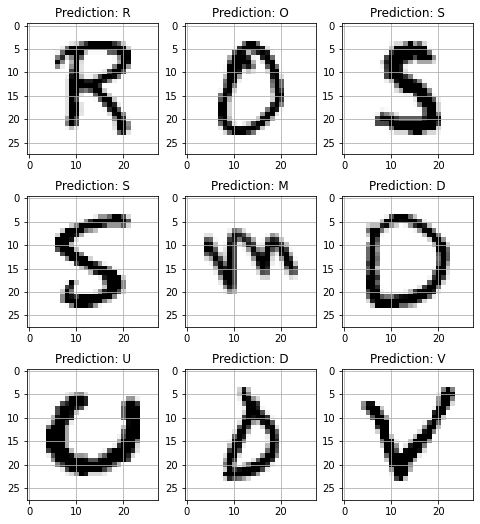

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [ ]:
#model.save('/content/drive/MyDrive/AI4E/datasetA-Z/model.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/AI4E/datasetA-Z/model.h5')

Text(159.0, 0.5, 'Truth')

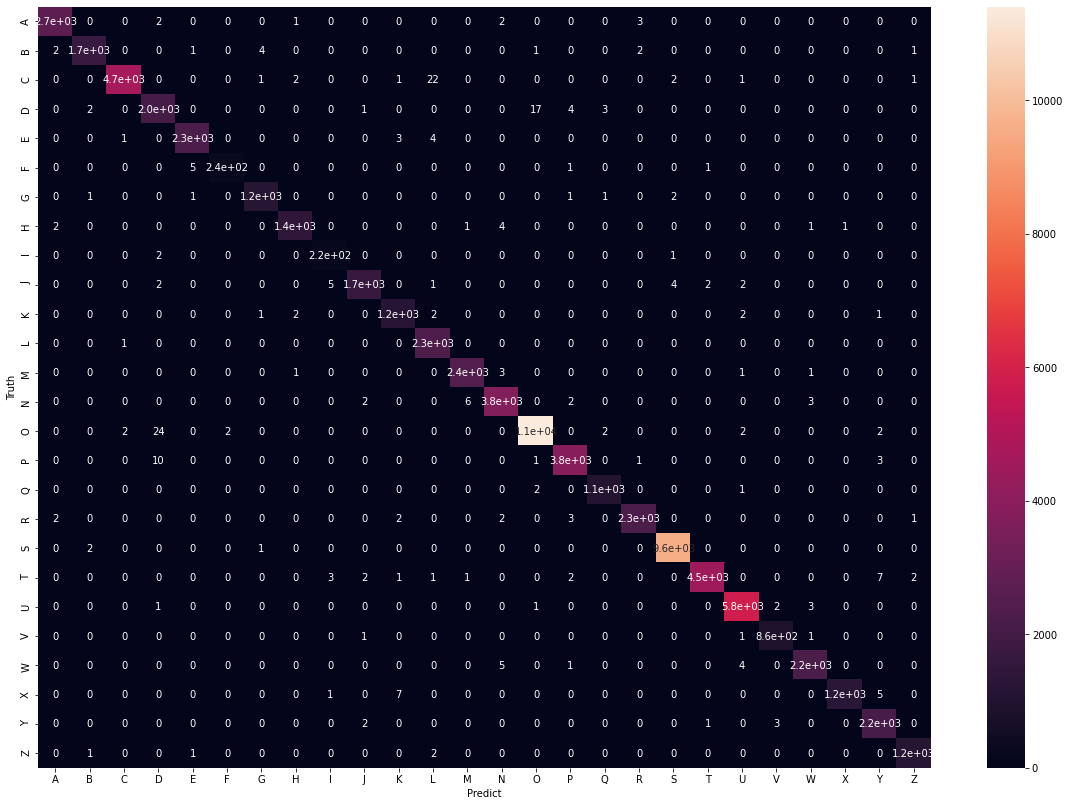

In [ ]:
from sklearn.metrics import confusion_matrix
target = word_dict.values()
y_predicted = model.predict(test_X)
label = np.argmax(y_predicted, axis=1)
#test_y = test_y.to_numpy()

cm = confusion_matrix(test_y, label)
cm = pd.DataFrame(data=cm[0:,0:], index = target, columns= target)
plt.figure(figsize = (20,14))
sns.heatmap(cm, annot=True)
plt.xlabel("Predict")
plt.ylabel("Truth")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, label, target_names= target))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2741
           B       1.00      0.99      1.00      1743
           C       1.00      0.99      1.00      4710
           D       0.98      0.99      0.98      2077
           E       1.00      1.00      1.00      2292
           F       0.99      0.97      0.98       252
           G       0.99      0.99      0.99      1194
           H       1.00      0.99      0.99      1439
           I       0.96      0.99      0.97       219
           J       1.00      0.99      0.99      1703
           K       0.99      0.99      0.99      1221
           L       0.99      1.00      0.99      2337
           M       1.00      1.00      1.00      2441
           N       1.00      1.00      1.00      3770
           O       1.00      1.00      1.00     11435
           P       1.00      1.00      1.00      3848
           Q       0.99      1.00      1.00      1100
           R       1.00    

In [ ]:
img = cv2.imread(r'/content/drive/MyDrive/AI4E/datasetA-Z/Capture.PNG')
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [ ]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

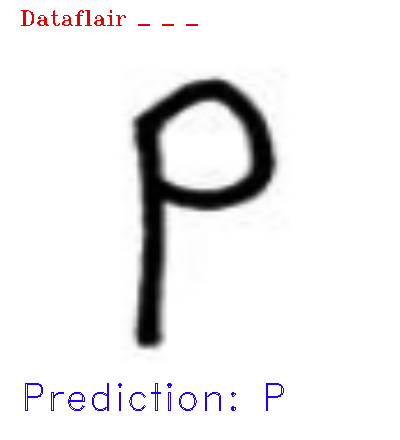

In [ ]:
from google.colab.patches import cv2_imshow
img_pred = word_dict[np.argmax(model.predict(img_final))]
cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2_imshow(img)